In [1]:
text = [("I love you", "P"),
        ("love happy weekend", "P"),
        ("bore work job", "N"),
        ("I hate you", "N"),
        ("bore weekend", "N"),
        ("happy together", "P")]

In [2]:
'''
P:0
N:1
'''
from collections import defaultdict

positive_cnt  = 0
negative_cnt  = 0

wordfreq = defaultdict(lambda : [0, 0])
for doc, label in text:
    words = doc.split()
    label = 0 if label == "P" else 1
    
    for word in words:
        wordfreq[word][label] += 1
        
print(wordfreq)

for key, (cnt0, cnt1) in wordfreq.items():
    positive_cnt += cnt0
    negative_cnt += cnt1
    
print(positive_cnt, negative_cnt)

defaultdict(<function <lambda> at 0x000001ED2936A708>, {'I': [1, 1], 'love': [2, 0], 'you': [1, 1], 'happy': [2, 0], 'weekend': [1, 1], 'bore': [0, 2], 'work': [0, 1], 'job': [0, 1], 'hate': [0, 1], 'together': [1, 0]})
8 8


In [3]:
k = 0.5
wordprob = defaultdict(lambda : [0, 0])

for key, (cnt0, cnt1) in wordfreq.items():
    wordprob[key][0] = (k + cnt0 ) / ( 2*k + positive_cnt)
    wordprob[key][1] = (k + cnt1 ) / ( 2*k + negative_cnt)
    
wordprob

defaultdict(<function __main__.<lambda>()>,
            {'I': [0.16666666666666666, 0.16666666666666666],
             'love': [0.2777777777777778, 0.05555555555555555],
             'you': [0.16666666666666666, 0.16666666666666666],
             'happy': [0.2777777777777778, 0.05555555555555555],
             'weekend': [0.16666666666666666, 0.16666666666666666],
             'bore': [0.05555555555555555, 0.2777777777777778],
             'work': [0.05555555555555555, 0.16666666666666666],
             'job': [0.05555555555555555, 0.16666666666666666],
             'hate': [0.05555555555555555, 0.16666666666666666],
             'together': [0.16666666666666666, 0.05555555555555555]})

In [4]:
import math


def get_prob(doc):
    tokens = doc.split()

    log_prob0, log_prob1 = 0.0, 0.0

    for word, (prob0, prob1) in wordprob.items():
        if word in tokens:
            log_prob0 += math.log(prob0)
            log_prob1 += math.log(prob1)

    log_prob0 += math.log(positive_cnt / (positive_cnt + negative_cnt))
    log_prob1 += math.log(negative_cnt / (positive_cnt + negative_cnt))

    prob0 = math.exp(log_prob0)
    prob1 = math.exp(log_prob1)
    
    return prob0, prob1


doc = "happy weekend"
prob0, prob1 = get_prob(doc)


In [5]:
print(prob0, prob1)

0.023148148148148143 0.0046296296296296285


In [6]:
print("긍정 확률 {:.1f}%".format((prob0 / (prob0 + prob1)) * 100))
print("부정 확률 {:.1f}%".format((prob1 / (prob0 + prob1)) * 100))

긍정 확률 83.3%
부정 확률 16.7%


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB



In [51]:
X_train = [t[0] for t in text]
y_train = [t[1] for t in text]
X_train

['I love you',
 'love happy weekend',
 'bore work job',
 'I hate you',
 'bore weekend',
 'happy together']

In [52]:
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)

clf = MultinomialNB()
clf.fit(X_train_count, y_train)


MultinomialNB()

In [55]:
clf.predict(count_vectorizer.transform(["happy weekend together"]))

array(['P'], dtype='<U1')

In [56]:
clf.predict_proba(count_vectorizer.transform(["happy weekend together"])) #proba(확률)

array([[0.14285714, 0.85714286]])

In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [19]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        199992 non-null  int64 
 1   document  199992 non-null  object
 2   label     199992 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [20]:
df.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['document'], df['label'], shuffle=True, random_state=42)
X_train[:10]

186420    진짜요즘런닝맨 개재미없네요 쓸떼없이 게스트 쳐부르지말고 그냥 멤버끼리만하면안됨?? ...
42641                너무 재밌고 감동 ㅠㅠ 그루 츤데레 그리고 미니언들 너무너무너무귀엽다
110059                    스토리는 천군보다 나은데....연출이나 연기 참 못한다...
66757                                  분위기에 취해 버리게 만드는 영화..
164593                                           노잼노잼노잼노잼노잼
56451                               이렇게재밌는영화를보면리뷰를남기는게예의겟지?
130924                                        아.. 어쩌란 말이냐..
26836                                세실리아와 로비의 사랑이 너무 안타깝네요
67863                                        두 배우 넘 조합이 좋다!
145657                                         말이 필요없는 쓰레기.
Name: document, dtype: object

In [22]:
y_train[:10]

186420    0
42641     1
110059    0
66757     1
164593    0
56451     1
130924    0
26836     1
67863     1
145657    0
Name: label, dtype: int64

In [23]:
count_vect = CountVectorizer()
X_train_count = count_vect.fit_transform(X_train)
clf = MultinomialNB().fit(X_train_count, y_train)

In [24]:
X_test_count = count_vect.transform(X_test)
predicted = clf.predict(X_test_count)
np.mean(predicted == y_test)

0.8304132165286612

In [25]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))), ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB(alpha=0.5))])

text_clf = text_clf.fit(X_train, y_train)

In [26]:
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

0.8350934037361495

In [27]:
from sklearn.model_selection import GridSearchCV

params_clf = {"vect__ngram_range":[(1, 1), (1, 2), (1, 3)],
             "clf__alpha": (1, 0.5, 0.1, 0.001)}

gs_clf = GridSearchCV(text_clf, params_clf, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

In [31]:
best_paramters = gs_clf.best_estimator_.get_params()
for param_name in sorted(list(best_paramters.keys())):
    print("{} : {}".format(param_name, best_paramters[param_name]))

clf : MultinomialNB(alpha=0.5)
clf__alpha : 0.5
clf__class_prior : None
clf__fit_prior : True
memory : None
steps : [('vect', CountVectorizer(ngram_range=(1, 2))), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB(alpha=0.5))]
tfidf : TfidfTransformer()
tfidf__norm : l2
tfidf__smooth_idf : True
tfidf__sublinear_tf : False
tfidf__use_idf : True
vect : CountVectorizer(ngram_range=(1, 2))
vect__analyzer : word
vect__binary : False
vect__decode_error : strict
vect__dtype : <class 'numpy.int64'>
vect__encoding : utf-8
vect__input : content
vect__lowercase : True
vect__max_df : 1.0
vect__max_features : None
vect__min_df : 1
vect__ngram_range : (1, 2)
vect__preprocessor : None
vect__stop_words : None
vect__strip_accents : None
vect__token_pattern : (?u)\b\w\w+\b
vect__tokenizer : None
vect__vocabulary : None
verbose : False


In [32]:
predicted = gs_clf.best_estimator_.predict(X_test)
np.mean(predicted == y_test)

0.8350934037361495

In [40]:
sent_dict = {}
with open("pos_pol_word.txt", "r", encoding="utf-8") as f: #'r' : 읽는다
    sent_dict["pos"] =f.read().split("\n")[19:]
    
with open("neg_pol_word.txt", "r", encoding="utf-8") as f:
    sent_dict["neg"] =f.read().split("\n")[19:]


In [41]:
print(sent_dict["pos"][:10])
print("\n\n")
print(sent_dict["neg"][:10])


['(-;', '(^^)', '(^-^)', '(^^*', '(^_^)', '(^o^)', '*^^*', '/^o^\\', ':(', ":'-("]



['가난', '가난뱅이', '가난살이', '가난살이하다', '가난설음', '가난에', '가난에 쪼들려서', '가난하게', '가난하고', '가난하고 어렵다']


In [38]:
txt = "코로나19의 여파로 전 세계 교사들과 학생들 모두 혼란스러운 시기를 보내고 있습니다. 초유의 상황에서도, 학생들을 위해 최선을 다하려는 선생님들의 노력이 계속되고 있는데요. 어려움 속에서, 선생님들은 어떤 방법으로 사랑을 전하고 있을까요? 뉴스G에서 전해드립니다. [리포트] 중국 저장성의 한 산골 마을. 초등학교 교사 왕진량 씨는 지난 2월 말부터, 매일 새벽 다섯 시면 부지런히 집을 나섭니다. 온라인 수업을 받을 수 없는, 깊은 산골 마을에 살고 있는 학생들을 찾아가기 위해서인데요. 선생님이 하루 동안 이동하는 거리는 대략 30km정도. 차도 없이 도보로 네 개의 마을을 돌아다니며 학생들을 만납니다. 매일 이어지는 강행군이지만, 오로지 아이들의 학습이 중단되어서는 안 된다는 생각뿐입니다. 혹시 모를 사태에 대비해 학생들과의 접촉은 최대한 줄입니다. 숙제를 내주고, 검사 후에 모르는 문제를 알려주는 식으로 일대일 수업을 진행하고 있는데요. 아이들에게 배우는 즐거움이 얼마나 소중한 것인지 잘 알기에, 선생님은 이렇게라도 수업을 할 수 있다는 데서 행복을 느낍니다. 영국의 한 초등학교 교사인 젠 포울스 씨는 매일 아침, 무거운 짐을 앞 뒤, 양 옆으로 짊어지고 씩씩하게 발걸음을 옮깁니다. 코로나19로 학교가 문을 닫은 뒤, 형편이 어려운 학생들을 위해 매일 78인분의 점심 도시락을 배달하고 있는데요. 선생님이 재직 중인 초등학교는 전체 학생의 41퍼센트가 무상 급식 대상자이기 때문입니다. 도시락의 무게는 18kg, 걸어야 하는 거리는 8km에 달하지만 기다리는 학생들을 생각하며 지치지 않고 발걸음을 재촉합니다. 학생들은 창문을 통해서 반갑게 인사하기도 하고, 선생님이 볼 수 있게 감사 메시지를 붙여 놓기도 하는데요. 선생님이 정성껏 준비해 손수 배달한 사랑의 도시락. 봉쇄된 도시의 굶주린 아이들에게 소중한 한 끼 식사, 그 이상의 의미가 되고 있습니다. 미국 사우스다코타 주의 중학교 수학 교사인 크리스 와바 씨는, 커다란 화이트보드를 들고 학생의 집을 찾았습니다. 온라인 수업 후, 학생에게 이메일로 방정식 풀이법에 대한 질문을 받았기 때문인데요. 이메일로 답변해주는 것보다 직접 풀이 과정을 보여주는 게 낫다는 생각이었죠. 깜짝 놀란 학생을 마주한 채, 선생님은 현관문 앞에서 열정적으로 문제를 풀기 시작했습니다. 이 열정적인 강의는, 학생이 풀이법을 완벽히 이해할 때까지 이어졌는데요. 바이러스는 전 세계 교실에 혼란을 불러왔지만, 선생님들의 노력은 저마다의 방식으로 계속되고 있습니다. 어려움 속에서도 학생들을 위해 안간힘을 쓰고 있는 모든 선생님들에게, 응원과 박수를 함께 보냅니다."

In [48]:
from konlpy.tag import Mecab
mecab = Mecab()

def analyze_sentiment(text, sent_dict):
    pos = []
    neg = []
    
    word_list = text.split()
    
    for word in word_list:
        if word in sent_dict["pos"]:
            pos.append(word)
            
        if word in sent_dict["neg"]:
            neg.append(word)
            
    return (len(pos)/(len(pos) + len(neg)), pos) , (len(neg)/(len(pos) + len(neg)), neg)
            

In [49]:
pos, neg = analyze_sentiment(txt, sent_dict)
print(pos, neg)

(0.6666666666666666, ['사랑을', '부지런히', '즐거움이', '소중한', '잘', '행복을', '씩씩하게', '감사', '정성껏', '사랑의', '소중한', '함께']) (0.3333333333333333, ['혼란스러운', '어려움', '모르는', '어려운', '굶주린', '어려움'])


In [57]:
import pandas as pd

df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [58]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [59]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
X.head()

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0


In [60]:
Y = df[['body_shape']]
Y.head()

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat


In [61]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [62]:
x_std.mean()

3.552713678800501e-17

In [63]:
x_std.std()

1.0

In [64]:
import numpy as np

In [65]:
features = x_std.T
covariance_matrix = np.cov(features)

covariance_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [67]:
x_std.T.dot(x_std)/9

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [68]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print("eig values \n", eig_vals)
print("eig vectors \n", eig_vecs)

eig values 
 [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
eig vectors 
 [[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [78]:
(eig_vals[0]+ eig_vals[1] + eig_vals[2])/sum(eig_vals)

0.8965415116468555

In [70]:
print(x_std.shape)
print(eig_vecs.shape)

(10, 5)
(5, 5)


In [71]:
projected_X = x_std.dot(eig_vecs.T[0]) #기대값을 구하기 위해, 분산정도를 보기 위해
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [72]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0 #5차원을 1차원으로 축소하기 위해 0.0 설정
result['label'] = Y
result

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


In [76]:
!pip install seaborn

C:\Users\student\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA result')

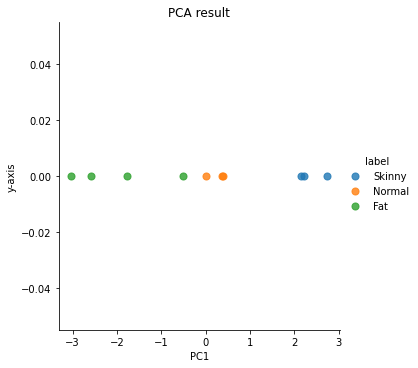

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False, scatter_kws={"s": 50}, hue='label')
plt.title('PCA result')

In [79]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=1)
pca_x = pca.fit_transform(x_std)
pca_x

array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

C:\Users\student\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA result')

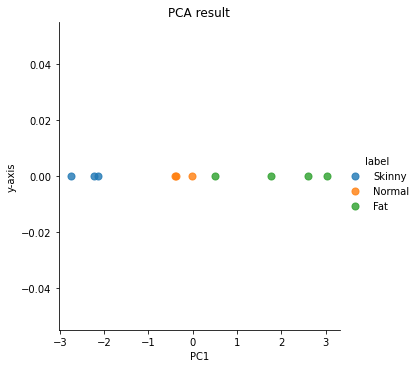

In [81]:
sklearn_result = pd.DataFrame(pca_x, columns=["PC1"])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False, scatter_kws={"s": 50}, hue='label')
plt.title('PCA result')

In [82]:
pca = decomposition.PCA(n_components=2)
pca_x = pca.fit_transform(x_std)
pca_x

array([[-2.22600943, -0.54936514],
       [-0.0181432 , -0.23871898],
       [ 1.76296611,  0.36868681],
       [-2.73542407,  0.4544983 ],
       [ 3.02711544, -0.41305057],
       [-2.14702579, -0.83449111],
       [-0.37142473, -1.05380594],
       [ 2.59239883, -0.3985085 ],
       [-0.39347815,  2.09420397],
       [ 0.50902498,  0.57055116]])

C:\Users\student\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA result')

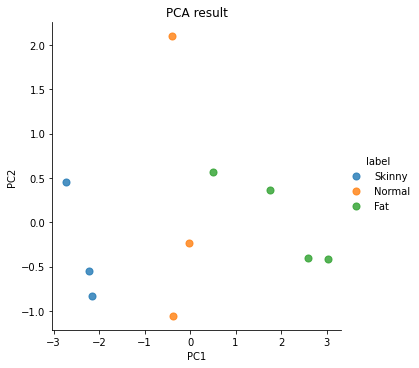

In [83]:
sklearn_result = pd.DataFrame(pca_x, columns=["PC1", "PC2"])
sklearn_result['label'] = Y

sns.lmplot('PC1', 'PC2', data=sklearn_result, fit_reg=False, scatter_kws={"s": 50}, hue='label')
plt.title('PCA result')

In [84]:
A = np.array([[1, 0, 0, 0, 2],
              [0, 0, 3, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 2, 0, 0, 0]])

In [85]:
U, s, VT = np.linalg.svd(A)
print(U)
print(s)
print(VT)

[[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]
[3.         2.23606798 2.         0.        ]
[[-0.          0.          1.         -0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [-0.          1.          0.         -0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


resolution :  (1920, 1200)


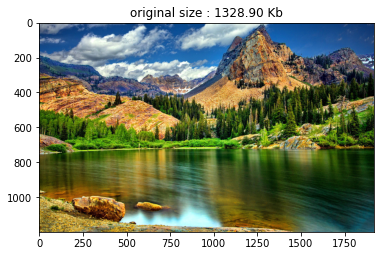

In [88]:
import os
from PIL import Image

path = "nature.jpg"
img = Image.open(path)

s = float(os.path.getsize(path))/1000
print("resolution : ", img.size)
plt.title("original size : {:.2f} Kb".format(s))
plt.imshow(img)

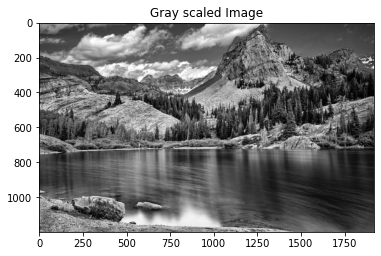

In [89]:
imggray = img.convert("LA")
imgmat = np.array(list(imggray.getdata(band=0)), float)

imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure()
plt.imshow(imgmat, cmap="gray")
plt.title("Gray scaled Image")
plt.show()

In [91]:
imgmat.shape

(1200, 1920)

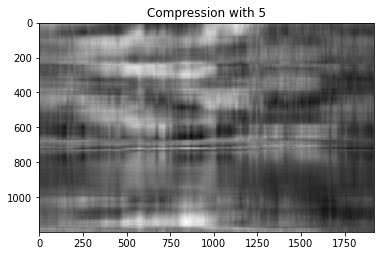

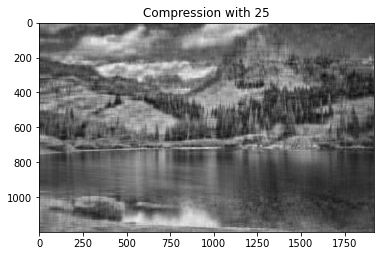

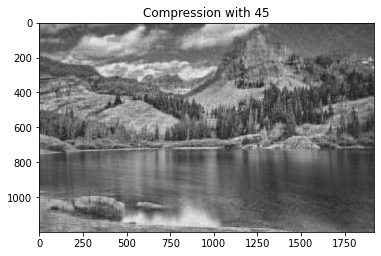

In [92]:
U, S, Vt = np.linalg.svd(imgmat)

for i in range(5, 51, 20):
    cmpimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i, :])
    plt.imshow(cmpimg, cmap='gray')
    plt.title(f"Compression with {i}")
    plt.show()